In [95]:
!pip install scipy

In [109]:
import pandas as pd

url = "https://github.com/npenchev88/summer-school-2025-crypto-forecasting/raw/refs/heads/main/resources/data/BTC_Historical_Data.xlsx"
df = pd.read_excel(url, engine='openpyxl')

df['date'] = pd.to_datetime(df['date']).dt.date

df = df.sort_values('date').reset_index(drop=True)

df['Daily Return'] = (df['close'] - df['open']) / df['open'] * 100


# Summary Stats (Mean, Pos/Neg Returns, Frequencies)

In [110]:
import numpy as np

returns = df['Daily Return'].dropna()

# Basic stats
average_return = returns.mean()
positive_returns = returns[returns > 0]
negative_returns = returns[returns < 0]

avg_positive = positive_returns.mean()
avg_negative = negative_returns.mean()

freq_positive = len(positive_returns)
freq_negative = len(negative_returns)
total_days = len(returns)

perc_positive = freq_positive / total_days * 100
perc_negative = freq_negative / total_days * 100

# number of zero-return days (if relevant)
zero_returns = returns[returns == 0]
freq_zero = len(zero_returns)
perc_zero = freq_zero / total_days * 100

weighted_avg_positive = avg_positive * (perc_positive / 100)
weighted_avg_negative = avg_negative * (perc_negative / 100)

return_summary = pd.DataFrame({
    'Category': ['Average Return', 'Average Positive', 'Average Negative', 'Zero Returns'],
    'Average Return': [f"{average_return:.2%}", f"{avg_positive:.2f}%", f"{avg_negative:.2f}%", '0.00%'],
    'Frequency': ['', freq_positive, freq_negative, freq_zero],
    'Frequency %': ['', f"{perc_positive:.2f}%", f"{perc_negative:.2f}%", f"{perc_zero:.2f}%"],
    'Avg Return': ['', f"{weighted_avg_positive:.2f}%", f"{weighted_avg_negative:.2f}%", '0.00%']
})

print("\n=== Return Summary ===")
print(return_summary)



=== Return Summary ===
           Category Average Return Frequency Frequency % Avg Return
0    Average Return         21.77%                                 
1  Average Positive          2.47%      2011      52.53%      1.30%
2  Average Negative         -2.28%      1810      47.28%     -1.08%
3      Zero Returns          0.00%         7       0.18%      0.00%


# Histogram Bins and Frequency Table

In [111]:
bin_edges = [-np.inf, -15, -10, -5, -2, 0, 2, 5, 10, 15, np.inf]
bin_labels = [
    "Less than -15%",
    "-15% to -10%",
    "-10% to -5%",
    "-5% to -2%",
    "-2% to 0%",
    "0% to 2%",
    "2% to 5%",
    "5% to 10%",
    "10% to 15%",
    "Greater than 15%"
]

df['Bin Interval'] = pd.cut(df['Daily Return'], bins=bin_edges)
df['Bin Label'] = pd.cut(df['Daily Return'], bins=bin_edges, labels=bin_labels)

grouped = df.groupby('Bin Interval')

bin_counts = grouped.size()

probabilities = bin_counts / bin_counts.sum() * 100

cumulative_percentages = probabilities.cumsum()

histogram_table = pd.DataFrame({
    'Bin Interval': bin_counts.index.astype(str),
    'Bin Label': bin_labels,
    'Frequency': bin_counts.values,
    'Probability (%)': probabilities.round(2).values,
    'Cumulative (%)': cumulative_percentages.round(2).values
})

print(histogram_table)


     Bin Interval         Bin Label  Frequency  Probability (%)  \
0   (-inf, -15.0]    Less than -15%          8             0.21   
1  (-15.0, -10.0]      -15% to -10%         34             0.89   
2   (-10.0, -5.0]       -10% to -5%        185             4.83   
3    (-5.0, -2.0]        -5% to -2%        461            12.04   
4     (-2.0, 0.0]         -2% to 0%       1129            29.49   
5      (0.0, 2.0]          0% to 2%       1169            30.54   
6      (2.0, 5.0]          2% to 5%        588            15.36   
7     (5.0, 10.0]         5% to 10%        200             5.22   
8    (10.0, 15.0]        10% to 15%         44             1.15   
9     (15.0, inf]  Greater than 15%         10             0.26   

   Cumulative (%)  
0            0.21  
1            1.10  
2            5.93  
3           17.97  
4           47.47  
5           78.00  
6           93.36  
7           98.59  
8           99.74  
9          100.00  


C:\Users\Kameliya.Stefanova\AppData\Local\Temp\ipykernel_14500\2139265965.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Bin Interval')


# Descriptive Statistics and Standard Deviations

In [112]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, mode

returns = df['Daily Return'].dropna()

# Core stats
mean = returns.mean()
std_dev = returns.std()
std_err = returns.sem()
median = returns.median()
mode_val = mode(returns, keepdims=False).mode
variance = returns.var()
kurt = kurtosis(returns, fisher=False)
skewness = skew(returns)
minimum = returns.min()
maximum = returns.max()
range_val = maximum - minimum
total_sum = returns.sum()
count = returns.count()

# Table 1: Descriptive Statistics
descriptive_stats = pd.DataFrame({
    'Metric': [
        'Mean', 'Standard Error', 'Median', 'Mode', 'Standard Deviation', 'Sample Variance',
        'Kurtosis', 'Skewness', 'Range', 'Minimum', 'Maximum', 'Sum', 'Count'
    ],
    'Value': [
        mean, std_err, median, mode_val, std_dev, variance,
        kurt, skewness, range_val, minimum, maximum, total_sum, count
    ]
})

# Table 2: Std Dev Bands
std_band_df = pd.DataFrame({
    'Metric': [
        'Mean + 1σ', 'Mean - 1σ',
        'Mean + 2σ', 'Mean - 2σ',
        'Mean + 3σ', 'Mean - 3σ'
    ],
    'Value': [
        mean + std_dev, mean - std_dev,
        mean + 2*std_dev, mean - 2*std_dev,
        mean + 3*std_dev, mean - 3*std_dev
    ]
})

# Table 3: Std Dev Distribution Table
within_1_std = returns[(returns >= mean - std_dev) & (returns <= mean + std_dev)]
within_2_std = returns[(returns >= mean - 2*std_dev) & (returns <= mean + 2*std_dev)]
within_3_std = returns[(returns >= mean - 3*std_dev) & (returns <= mean + 3*std_dev)]

actual_counts = [len(within_1_std), len(within_2_std), len(within_3_std)]
normal_percents = [0.682, 0.954, 0.998]
normal_counts = [round(p * count, 3) for p in normal_percents]
actual_percents = [round((x / count) * 100, 2) for x in actual_counts]
normal_percents_percent = [round(p * 100, 2) for p in normal_percents]

std_dev_comparison = pd.DataFrame({
    'Std Dev': [1, 2, 3],
    'Actual Count': actual_counts,
    'Normal Count': normal_counts,
    'Actual %': actual_percents,
    'Normal %': normal_percents_percent
})

print("\n=== Descriptive Statistics ===")
print(descriptive_stats)

print("\n=== Standard Deviation Bands ===")
print(std_band_df)

print("\n=== Std Dev Coverage Comparison (Actual vs Normal) ===")
print(std_dev_comparison)




=== Descriptive Statistics ===
                Metric        Value
0                 Mean     0.217744
1       Standard Error     0.058562
2               Median     0.124185
3                 Mode     0.000000
4   Standard Deviation     3.623258
5      Sample Variance    13.127999
6             Kurtosis    11.759999
7             Skewness    -0.131506
8                Range    66.411001
9              Minimum   -39.182377
10             Maximum    27.228623
11                 Sum   833.522476
12               Count  3828.000000

=== Standard Deviation Bands ===
      Metric      Value
0  Mean + 1σ   3.841002
1  Mean - 1σ  -3.405514
2  Mean + 2σ   7.464260
3  Mean - 2σ  -7.028772
4  Mean + 3σ  11.087518
5  Mean - 3σ -10.652030

=== Std Dev Coverage Comparison (Actual vs Normal) ===
   Std Dev  Actual Count  Normal Count  Actual %  Normal %
0        1          3012      2610.696     78.68      68.2
1        2          3606      3651.912     94.20      95.4
2        3          3768     

# Theoretical (Normal) Standard Deviation

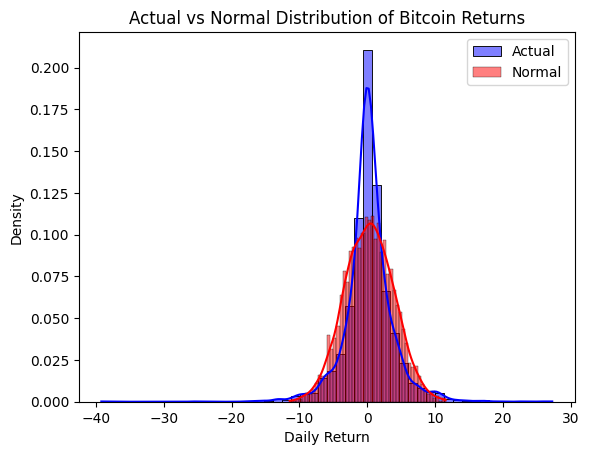

In [113]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate normal distribution with same mean and std
normal_data = np.random.normal(loc=mean, scale=actual_std, size=len(returns))

# Plot
sns.histplot(returns, bins=50, color='blue', label='Actual', stat='density', kde=True)
sns.histplot(normal_data, bins=50, color='red', label='Normal', stat='density', kde=True, alpha=0.5)
plt.legend()
plt.title("Actual vs Normal Distribution of Bitcoin Returns")
plt.show()


In [115]:
df_clean = df.drop(columns=['Bin Interval', 'Bin Label'], errors='ignore')
output_path = r"C:\Users\Kameliya.Stefanova\OneDrive - INDEAVR\Desktop\ks\ПХД\Summer School\Case\btc_analysis_output.xlsx"

with pd.ExcelWriter(output_path) as writer:
    df_clean.to_excel(writer, sheet_name='Data + Returns', index=False)
    histogram_table.to_excel(writer, sheet_name='Histogram Table', index=False)
    return_summary.to_excel(writer, sheet_name='Return Summary', index=False)
    descriptive_stats.to_excel(writer, sheet_name='Descriptive Stats', index=False)
    std_band_df.to_excel(writer, sheet_name='Std Dev Bands', index=False)
    std_dev_comparison.to_excel(writer, sheet_name='Std Dev Coverage', index=False)

df = df.sort_values('date', ascending=False).reset_index(drop=True)

print("Saved to:", output_path)

Saved to: C:\Users\Kameliya.Stefanova\OneDrive - INDEAVR\Desktop\ks\ПХД\Summer School\Case\btc_analysis_output.xlsx
